<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set up (Imports)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Memory Access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfPlayers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/footballers/final_data.csv')

In [ ]:
dfPlayers.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


**Display the summary statistics**

In [ ]:
dfPlayers.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


In [ ]:
features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'goals conceded', 'clean sheets',
            'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value', 'position_encoded', 'winger']
target = 'current_value'


In [ ]:
X = dfPlayers.loc[:, features]
Y = dfPlayers.loc[:, [target]]

**Split the data into training and testing sets**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Standarize the set**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Fit Linear Regression Model**

In [ ]:
regr = LinearRegression()
regr.fit(X_train_scaled, Y_train)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [3622354.9924445]
Coefficients: 
 [[  -17421.02441675  -996086.7752995  -1489519.97169125   181623.75819823
    158808.09238218    25473.40019629  -138523.75737018    47149.20928902
   2496044.52172059   698576.15345603 -1135753.23539428 -1379753.59453872
   8072019.01199603   -13229.51503593   -81575.55180542]]


In [ ]:
Y_pred = regr.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

**Test the model with a newly created player**

In [ ]:
New_Player_Features = [185, 28, 100, 10, 5, 3, 20, 12, 8000, 50, 5, 10, 60000000, 2, 0]
New_Player_Features_scaled = scaler.transform([New_Player_Features])
predicted_value = regr.predict(New_Player_Features_scaled)
print('Predicted Current Value: \n', predicted_value)

Predicted Current Value: 
 [[45009617.34177425]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


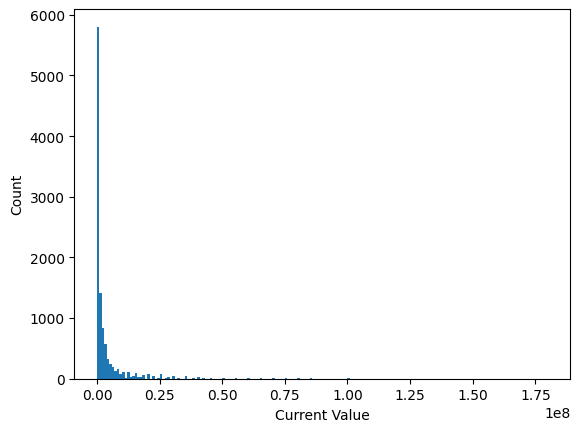

In [ ]:
y = dfPlayers.loc[:, 'current_value']

# Set histogram parameters
binwidth = 1000000
binrange = np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Current Value')
plt.ylabel('Count')
plt.show()

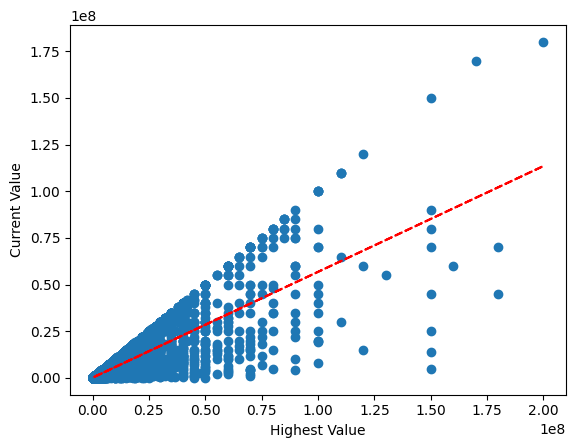

In [ ]:
x = dfPlayers.loc[:, 'highest_value']
y = dfPlayers.loc[:, 'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x, p(x), "r--")
plt.xlabel('Highest Value')
plt.ylabel('Current Value')
plt.show()

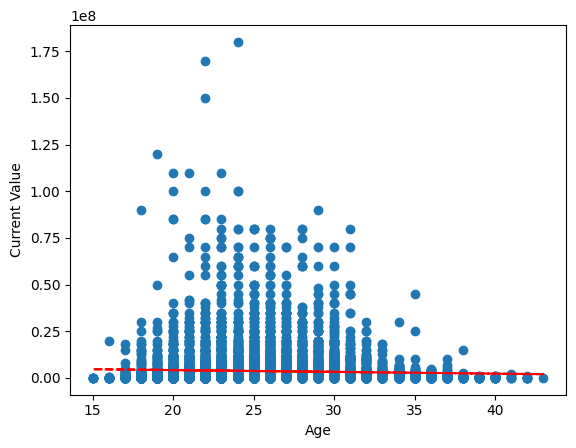

In [ ]:
# Scatterplot of current value vs. age
# Set data fields
x = dfPlayers.loc[:, 'age']
y = dfPlayers.loc[:, 'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x, p(x), "r--")
plt.xlabel('Age')
plt.ylabel('Current Value')
plt.show()